# Fraud Detection
                                                                                                           

# 1. Introduction

The aim of this project is to detect fraud in online payment transactions. Online payment fraud is a major concern for businesses as it can result in significant financial losses. Detecting fraud in real-time can help businesses to prevent fraudulent transactions and minimize the financial impact. In this project, I used a dataset from Kaggle, which contains transaction data with information on the transaction amount, customer details, and recipient details

Dataset:

Online payment transactions dataset was used from kaggle:
https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

About the Dataset:

The below column reference:

- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

3.	Hypotheses:
The primary hypothesis of this project is that machine learning models can accurately detect fraudulent transactions in online payment data. I will explore the following hypotheses:
1.	Fraudulent transactions have different characteristics compared to non-fraudulent transactions.
2.	Machine learning models can accurately classify transactions as fraudulent or non-fraudulent.
3.	Certain transaction features are more important in detecting fraud than others.

Planned Analysis:

To test the above hypotheses, i performed exploratory data analysis (EDA) to gain insights into the data and identify any patterns or anomalies. I preprocessed the data by cleaning, transforming, and normalizing it.

Using distributed technologies for data storage and processing, specifically Hadoop’s HDFS. Further, I have used Spark/Spark MLlib for data analysis and PySpark for coding. The dataset will be split into training and testing sets to avoid overfitting.

Next, using a pipeline to streamline the modelling process, which will include transforming categorical data using one-hot encoders. I also vectorized the data using a vector assembler.

Further applied three different classification models - logistic regression, random forest, and gradient-boosted trees. I had also tuned the models using different thresholds to reduce the number of false negatives and improve the accuracy of fraud detection.

Finally, the models were evaluated using AUC, sensitivity, specificity, and ROC curves to assess their performance and identify the best one for this dataset.

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317146 sha256=7ce113c7a992fdec42736032310545dc12528ba6756394d7503cae6d9b61ce60
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
#Importing libraries
from pyspark.sql import SparkSession
import pyspark

In [3]:
spark = SparkSession.builder.appName('bigd').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/14 14:58:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
data = spark.read.csv('/kaggle/input/financial-dataset-for-fraud-detection-in-a-comapny', inferSchema = True, header = True)

In [5]:
df = data.sample(fraction=0.11)

In [6]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
from pyspark.sql.functions import col
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# Print the shape of DataFrame
print((df.count(), len(df.columns)))

# Print the column names of DataFrame
print(df.columns)

(699675, 11)
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [8]:
# Print the schema of the PySpark DataFrame
df.printSchema()

# Print the summary statistics of the PySpark DataFrame
df.describe().show()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- nameDest: string (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)



23/05/14 15:00:29 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+--------+-----------------+-----------+------------------+------------------+----------+------------------+------------------+--------------------+--------------------+
|summary|              step|    type|           amount|   nameOrig|     oldbalanceOrg|    newbalanceOrig|  nameDest|    oldbalanceDest|    newbalanceDest|             isFraud|      isFlaggedFraud|
+-------+------------------+--------+-----------------+-----------+------------------+------------------+----------+------------------+------------------+--------------------+--------------------+
|  count|            699675|  699675|           699675|     699675|            699675|            699675|    699675|            699675|            699675|              699675|              699675|
|   mean|243.52023010683533|    null|179910.4644653872|       null| 838780.2890252324| 859900.8054355079|      null| 1097638.337023671| 1222073.966225195|0.001417801121949...|2.858470003930396E-6|
| stddev|142.36

In [9]:
#Casting 'amount' to float
df = df.withColumn("amount", col("amount").cast("float"))
df.printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: float (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- nameDest: string (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)



In [10]:
df.show(10)

+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|step|    type|   amount|   nameOrig|oldbalanceOrg|newbalanceOrig|   nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-----------+-------------+--------------+-----------+--------------+--------------+-------+--------------+
|   1|TRANSFER|    181.0|C1305486145|        181.0|           0.0| C553264065|           0.0|           0.0|      1|             0|
|   1| PAYMENT|  7107.77| C154988899|     183195.0|     176087.23| M408069119|           0.0|           0.0|      0|             0|
|   1|   DEBIT|  5337.77| C712410124|      41720.0|      36382.23| C195600860|       41898.0|      40348.79|      0|             0|
|   1|CASH_OUT|229133.94| C905080434|      15325.0|           0.0| C476402209|        5083.0|      51513.44|      0|             0|
|   1|   DEBIT|  1065.41|C1959239586|       1817.0|        751.59| C51513299

Counting the number of records in the dataframe for each unique value in the type column

In [11]:
from pyspark.sql.functions import count

df.groupBy("type").agg(count("*").alias("count")).show()

+--------+------+
|    type| count|
+--------+------+
|TRANSFER| 58751|
| CASH_IN|154112|
|CASH_OUT|245269|
| PAYMENT|236977|
|   DEBIT|  4566|
+--------+------+



In [12]:
#Dropping two object values that aren't useful for the model: nameOrig and nameDest
on_pay = df.select([x for x in df.columns if x not in ["nameOrig", "nameDest"]])
on_pay.show()

+----+--------+---------+-------------+--------------+--------------+--------------+-------+--------------+
|step|    type|   amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+---------+-------------+--------------+--------------+--------------+-------+--------------+
|   1|TRANSFER|    181.0|        181.0|           0.0|           0.0|           0.0|      1|             0|
|   1| PAYMENT|  7107.77|     183195.0|     176087.23|           0.0|           0.0|      0|             0|
|   1|   DEBIT|  5337.77|      41720.0|      36382.23|       41898.0|      40348.79|      0|             0|
|   1|CASH_OUT|229133.94|      15325.0|           0.0|        5083.0|      51513.44|      0|             0|
|   1|   DEBIT|  1065.41|       1817.0|        751.59|       10330.0|           0.0|      0|             0|
|   1| PAYMENT|  6061.13|        443.0|           0.0|           0.0|           0.0|      0|             0|
|   1| PAYMENT|  5885.56|   

### 2. Train/Test Split
Performing a random split of the data into training and testing sets, ensuring that the testing set is not used during exploratory data analysis (EDA) to avoid any potential data leakage.

In [13]:
# Split the DataFrame into training and testing sets
train_set, test_set = on_pay.randomSplit([0.7, 0.3], seed=64)

In [14]:
# Select the features column from the training set
train_x = train_set.select([x for x in train_set.columns if x != "isFraud"])

# Create a new column for the target variable in the training set
train_Y = train_set.withColumn("label", train_set["isFraud"].cast("double")).select("label")

### 3. Data Exploration- EDA

I perform EDA on the training set using descriptive statistics and histograms to visualize data distributions. Further, check for unique variables and missing values in the data, and calculate the Pearson correlation matrix to check for correlations between features.

In [15]:
#Schema of the test set
train_set.printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: float (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)



In [16]:
#Descriptive statistics
train_set.describe().show()

+-------+------------------+--------+------------------+------------------+-----------------+------------------+------------------+--------------------+--------------------+
|summary|              step|    type|            amount|     oldbalanceOrg|   newbalanceOrig|    oldbalanceDest|    newbalanceDest|             isFraud|      isFlaggedFraud|
+-------+------------------+--------+------------------+------------------+-----------------+------------------+------------------+--------------------+--------------------+
|  count|            489274|  489274|            489274|            489274|           489274|            489274|            489274|              489274|              489274|
|   mean|243.53459411291016|    null|180068.02662965318| 836626.2419338452|857608.1992304085|1098939.1681354796|1224190.8351713542|0.001406165052710751|  4.0876891067173E-6|
| stddev| 142.4537089078485|    null| 589511.4787971606|2898581.8546327897|2934725.759686364| 3440644.735194276|3708282.7067244006

From the output of descriptive stats, it can be observed that the average transaction amount is around 180,068 and the standard deviation is very high at 589,511. We also see that the minimum transaction amount is 0, which could be an indicator of anomalies in the data. The isFraud and isFlaggedFraud columns have very low average values, indicating that there are very few fraudulent transactions in the data.

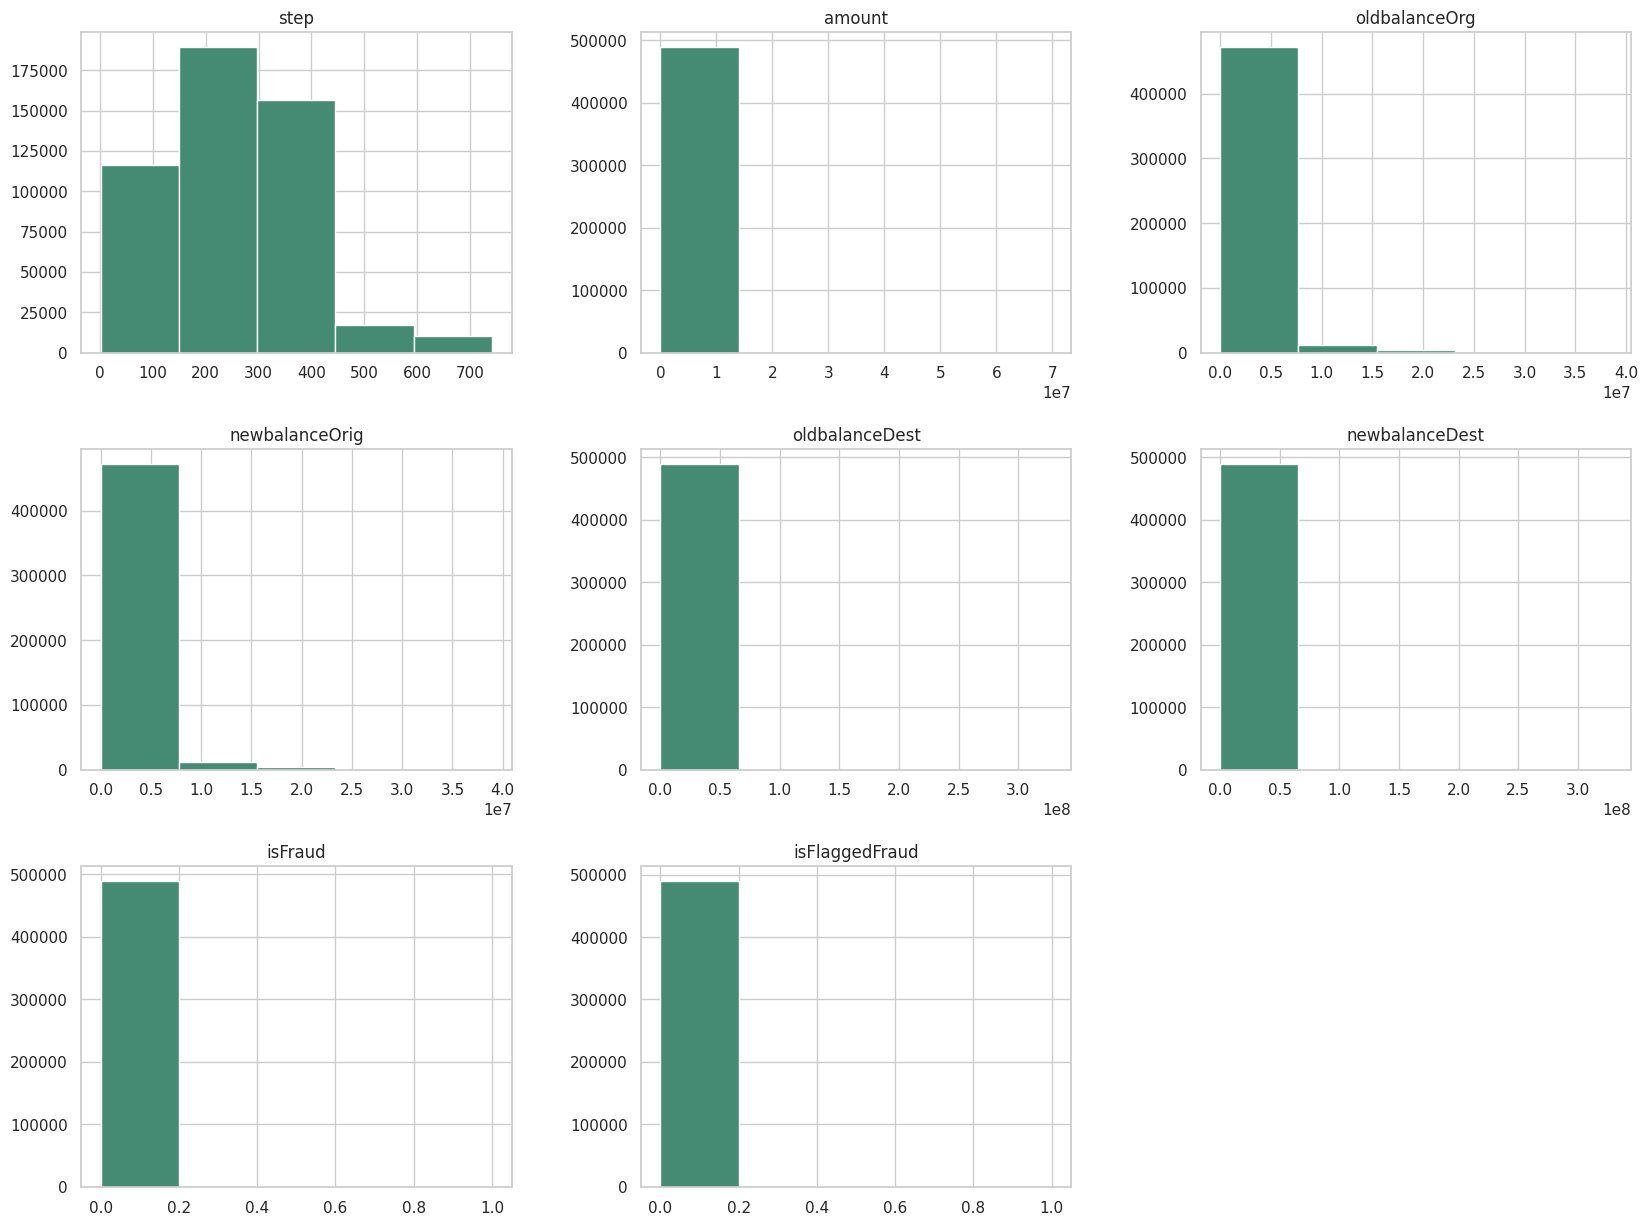

In [17]:
# visually inspecting the data with histograms showing bars of frequencies of numeric values grouped in bins.

# Convert the PySpark DataFrame to a Pandas DataFrame
train_set_pd = train_set.toPandas()

# Create the histograms
train_set_pd.hist(bins=5, figsize=(20,15), color='#458B74')
plt.show()

/tmp/ipykernel_34/2300401680.py:9: UserWarning:                                 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_pd, bins=5)


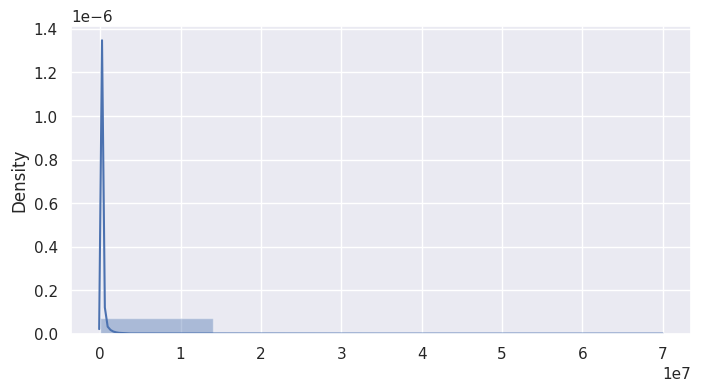

In [18]:
# Select the 'amount' column from the PySpark DataFrame
amount_column = train_x.select(col('amount'))

# Convert the PySpark DataFrame to a Pandas DataFrame
amount_pd = amount_column.toPandas()

# Create the dist plot
sns.set(rc={"figure.figsize": (8, 4)})
sns.distplot(amount_pd, bins=5)
plt.show()

Keeping in mind that some features may have skewed distributions due to the nature of the data. For example as seen above, the 'amount' column may have many values of 0, indicating that some people may not have any balance. Therefore, it is not appropriate to remove the outliers or deal with skewness here. Instead, it is better to keep in mind the unique characteristics of this dataset and analyze the data as it is.

In [19]:
# Number of unique values in each variable
# Define the list of variables to check
variables = train_x.columns

# Loop over the variables and print the number of unique values
for var in variables:
    unique_vals = train_x.select(var).distinct().count()
    print(var + ": " + str(unique_vals))

step: 607


type: 5


amount: 480469


oldbalanceOrg: 207875


newbalanceOrig: 211575


oldbalanceDest: 280586


newbalanceDest: 298228


isFlaggedFraud: 2


In [20]:
# Counting missing values in each column
from pyspark.sql.functions import col, sum
missing_count = train_x.select([sum(col(x).isNull().cast("int")).alias(x) for x in train_x.columns])
missing_count.show()

+----+----+------+-------------+--------------+--------------+--------------+--------------+
|step|type|amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFlaggedFraud|
+----+----+------+-------------+--------------+--------------+--------------+--------------+
|   0|   0|     0|            0|             0|             0|             0|             0|
+----+----+------+-------------+--------------+--------------+--------------+--------------+



The datase has no missing values and hence no missing values are handled.

**Correlations in the data**

In [21]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# drop 'type' column 
train_set_no_type = train_set.drop('type')

# assemble feature vector
assembler = VectorAssembler(inputCols=train_set_no_type.columns, outputCol='features')
vector_df = assembler.transform(train_set_no_type).select("features")

# calculate correlation matrix
corr_matrix = Correlation.corr(vector_df, "features").head()
corr_array = corr_matrix[0].toArray()

# create a dictionary of column names
columns = train_set_no_type.columns[:-1]
columns_dict = dict(zip(range(len(columns)), columns))

# print correlation matrix with column names
print("Pearson correlation matrix:")
for i, row in enumerate(corr_array):
    print("{:<20}".format(columns_dict.get(i, '')), end="")
    for j, value in enumerate(row):
        print("{:>10.3f}".format(value), end="")
    print("\n")

23/05/14 15:03:23 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


Pearson correlation matrix:
step                     1.000     0.024    -0.009    -0.010     0.027     0.026     0.031     0.006

amount                   0.024     1.000    -0.003    -0.008     0.282     0.446     0.082     0.013

oldbalanceOrg           -0.009    -0.003     1.000     0.999     0.066     0.043     0.010     0.006

newbalanceOrig          -0.010    -0.008     0.999     1.000     0.068     0.042    -0.009     0.005

oldbalanceDest           0.027     0.282     0.066     0.068     1.000     0.977    -0.007    -0.001

newbalanceDest           0.026     0.446     0.043     0.042     0.977     1.000     0.000    -0.001

isFraud                  0.031     0.082     0.010    -0.009    -0.007     0.000     1.000     0.054

                         0.006     0.013     0.006     0.005    -0.001    -0.001     0.054     1.000



- The correlation coefficient between "amount" and "newbalanceDest" is 0.446, suggesting a moderately strong positive linear relationship between the two variables. 

- The correlation coefficient between "oldbalanceOrg" and "newbalanceOrig" is 0.999, which suggests a nearly perfect positive linear relationship between these two variables. This makes sense since the new balance is calculated based on the old balance and any transactions that may have occurred.

- The correlation coefficient between "isFraud" and "isFlaggedFraud" is 0.054, which suggests a weak positive linear relationship between these two variables. This means that there may be some correlation between these two variables, but it is not strong enough to make any definitive conclusions.

### 4. Handling Imbalanced fraud class:

Imbalanced fraud class is handled by generating additional samples for the minority class (fraud) to achieve a 60:40 ratio using the VectorAssembler, explode, and lit functions from PySpark, as well as the groupBy, count, filter, and union functions. The resulting balanced dataframe is saved as 'combined_df'.

In [22]:
# Classes - Fraud/ No fraud
from pyspark.sql.functions import col

count_no_fraud = train_set.filter(col("isFraud") == 0).count()
count_fraud = train_set.filter(col("isFraud") == 1).count()
pct_of_no_frd = count_no_fraud / (count_no_fraud + count_fraud)
print("Percentage of Not a fraud is", pct_of_no_frd * 100)
pct_of_frd = count_fraud / (count_no_fraud + count_fraud)
print("Percentage of fraud", pct_of_frd * 100)

Percentage of Not a fraud is 99.85938349472893
Percentage of fraud 0.14061650527107508


The percentage of non-fraud cases in the original train set is 99.86%, while the percentage of fraud cases is only 0.14%. This shows that the class ratio is highly imbalanced, and therefore, the imbalance of the fraud class needs to be handled.

**Handling imbalanced class**
To handle the imbalanced fraud class, first the number of instances for each class (fraud and non-fraud) is counted. The maximum count is determined, and the number of samples to generate for the minor class is calculated to achieve a 60:40 ratio. The minor class is then filtered, oversampled, and combined with the major class to create a new dataframe with a balanced 'isFraud' class. The new dataframe is named 'combined_df'. This is done using PySpark SQL functions such as col, explode, lit, and array, as well as PySpark ML feature VectorAssembler.

In [23]:
from pyspark.sql.functions import col, explode, lit
from pyspark.sql.functions import array
from pyspark.ml.feature import VectorAssembler

# count the number of instances for each class
counts = train_set.groupBy('isFraud').count()

# determine the maximum count
max_count = counts.agg({'count': 'max'}).collect()[0][0]

# calculate the number of samples to generate for the minor class to achieve a 60:40 ratio
fraud_count = counts.filter(col("isFraud") == 1).collect()[0][1]
non_fraud_count = counts.filter(col("isFraud") == 0).collect()[0][1]
ratio = 0.6
min_class_count = int(non_fraud_count * (1 - ratio) / ratio)
oversample_ratio = min_class_count // fraud_count

# filter the minor class
minor_df = train_set.filter(col("isFraud") == 1)

# oversample the minor class
oversampled_df = minor_df\
    .withColumn("dummy", explode(array([lit(x) for x in range(oversample_ratio)])))\
    .drop('dummy')

# combine the oversampled minor class with the major class
combined_df = train_set.filter(col("isFraud") == 0).union(oversampled_df)

**Calculating the number and % of 'isFraud' instances in both classs after handling the imbalance**

In [24]:
# count the number of instances for each class in combined_df
counts = combined_df.groupBy('isFraud').count()

# print the count of fraud and no-fraud instances in combined_df
count_no_fraud2 = combined_df.filter(col("isFraud") == 0).count()
count_fraud2 = combined_df.filter(col("isFraud") == 1).count()
print("Number of no-fraud instances in combined_df is", count_no_fraud2)
print("Number of fraud instances in combined_df is", count_fraud2)
pct_of_no_frd2 = count_no_fraud2 / (count_no_fraud2 + count_fraud2)
print("Percentage of Not a fraud is", pct_of_no_frd2 * 100)
pct_of_frd2 = count_fraud2 / (count_no_fraud2 + count_fraud2)
print("Percentage of fraud", pct_of_frd2 * 100)

Number of no-fraud instances in combined_df is 488586
Number of fraud instances in combined_df is 325424
Percentage of Not a fraud is 60.02211275045761
Percentage of fraud 39.97788724954239


In [25]:
combined_df.printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: float (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)



# 5. PreProcessing: 

In [26]:
# Select the features column from the training set
train_x_df = combined_df.select([x for x in combined_df.columns if x != "isFraud"])

# Create a new column for the target variable in the training set
train_y_df = combined_df.withColumn("label", combined_df["isFraud"].cast("double")).select("label")

In [27]:
train_x_df.printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: float (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)



In [28]:
train_y_df.printSchema()

root
 |-- label: double (nullable = true)



Data needs to be in higher tails - and henece can't be removed through outliers.

In [29]:
# Check the number of rows and columns in train_x_df
print("train_x_df shape:", (train_x_df.count(), len(train_x_df.columns)))

# Check the number of rows in train_y_df
print("train_y_df shape:", (train_y_df.count(), len(train_y_df.columns)))

train_x_df shape: (814010, 8)


train_y_df shape: (814010, 1)


#### 5.1 Pipeline and Tranformations

Pipeline is defined to transform the input data into features suitable for the models. Two separate pipelines are defined, one for categorical data and one for numerical data. The categorical pipeline encodes the "type" column using StringIndexer and OneHotEncoder. The numerical pipeline assembles the selected numerical columns into a vector, scaling the features using StandardScaler, and producing the final features in a column named "scaled_features". 

The two pipelines are combined to create a final Pipeline object which is then fitted on the input data. The transformed output is produced by applying this Pipeline to the input data using the transform method.

In [30]:
from pyspark.ml import Pipeline
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer, OneHotEncoder

# categorical pipeline
indexer = StringIndexer(inputCol="type", outputCol="typeIndex")
encoder = OneHotEncoder(inputCols=["typeIndex"], outputCols=["typeVec"])
cat_pipeline = Pipeline(stages=[indexer, encoder])

# numerical pipeline
num_cols = [col for col, dtype in train_x_df.dtypes if dtype == "double" or dtype == "int" and col not in ["isFraud", "isFlaggedFraud"]]
num_cols.append('typeVec')
assembler = VectorAssembler(inputCols=num_cols, outputCol="num_features")
scaler = StandardScaler(inputCol="num_features", outputCol="scaled_features", withStd=True, withMean=False)
num_pipeline = Pipeline(stages=[assembler, scaler])

# combined pipeline
pipeline = Pipeline(stages=[cat_pipeline, num_pipeline])
pipeline = pipeline.fit(on_pay)

# fit the pipeline on train_x to transform the data
transformed_train_x = pipeline.transform(combined_df)

In [31]:
transformed_train_x.printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: float (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)
 |-- typeIndex: double (nullable = false)
 |-- typeVec: vector (nullable = true)
 |-- num_features: vector (nullable = true)
 |-- scaled_features: vector (nullable = true)



In [32]:
fraud_count = transformed_train_x.groupBy('isFraud').count()
fraud_count.show()

+-------+------+
|isFraud| count|
+-------+------+
|      0|488586|
|      1|325424|
+-------+------+



In [33]:
transformed_train_x.show()

+----+-------+---------+-------------+--------------+--------------+--------------+-------+--------------+---------+-------------+--------------------+--------------------+
|step|   type|   amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|typeIndex|      typeVec|        num_features|     scaled_features|
+----+-------+---------+-------------+--------------+--------------+--------------+-------+--------------+---------+-------------+--------------------+--------------------+
|   1|CASH_IN|  7322.98|   6681389.66|    6688712.64|       64966.0|      57643.02|      0|             0|      2.0|(4,[2],[1.0])|[1.0,6681389.66,6...|[0.00702439481610...|
|   1|CASH_IN| 24936.34|   4824116.71|    4849053.05|      104408.0|      42450.71|      0|             0|      2.0|(4,[2],[1.0])|[1.0,4824116.71,4...|[0.00702439481610...|
|   1|CASH_IN|  26295.3|   8723514.56|    8749809.86| 1.391505995E7| 1.687464309E7|      0|             0|      2.0|(4,[2],[1.0])|[1.0,

### 6. Applying Models

**Transforming Test Set:**


As it's important to apply the same transformations to the test set as were applied to the training set, so that the test set is preprocessed in the same way and can be used to evaluate the performance of the model trained on the transformed training set. 

In [35]:
# load the test set
# apply the pipeline to the test set
transformed_test_x = pipeline.transform(test_set)
transformed_test_x.show()

+----+--------+---------+-------------+--------------+--------------+--------------+-------+--------------+---------+-------------+--------------------+--------------------+
|step|    type|   amount|oldbalanceOrg|newbalanceOrig|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|typeIndex|      typeVec|        num_features|     scaled_features|
+----+--------+---------+-------------+--------------+--------------+--------------+-------+--------------+---------+-------------+--------------------+--------------------+
|   1| CASH_IN|   863.08|   9290756.54|    9291619.62|       5577.88|        4714.8|      0|             0|      2.0|(4,[2],[1.0])|[1.0,9290756.54,9...|[0.00702439481610...|
|   1| CASH_IN|  1076.27|   3538789.28|    3539865.55|      22774.25|      23539.55|      0|             0|      2.0|(4,[2],[1.0])|[1.0,3538789.28,3...|[0.00702439481610...|
|   1| CASH_IN| 60215.46|   1032511.32|    1092726.78|      83172.04|           0.0|      0|             0|      2.0|(4,[2],[1.0])

In [36]:
transformed_test_x.printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: float (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)
 |-- typeIndex: double (nullable = false)
 |-- typeVec: vector (nullable = true)
 |-- num_features: vector (nullable = true)
 |-- scaled_features: vector (nullable = true)



#### 6.1 Logistic Regression


Applied logistic regression algorithm by setting up a parameter grid and cross-validation to find the best logistic regression model, and then evaluate its performance on the transformed test data using binary classification evaluator.

In [37]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt

# set up the parameter grid
param_grid = ParamGridBuilder() \
    .addGrid(LogisticRegression.regParam, [0.01, 0.05, 0.1]) \
    .addGrid(LogisticRegression.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()# create a Logistic Regression model object
lr = LogisticRegression(featuresCol="scaled_features", labelCol="isFraud", rawPredictionCol="rawPrediction")

# set up cross-validation
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="isFraud")
cv = CrossValidator(estimator=lr, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=3)

# fit the model to the transformed training data
lr_model = cv.fit(transformed_train_x)

# use the best estimator from cross-validation to make predictions on the transformed test data
best_lr = lr_model.bestModel
lr_predictions = best_lr.transform(transformed_test_x)

# evaluate the model's performance on the transformed test data
lr_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="isFraud")
lr_auc = lr_evaluator.evaluate(lr_predictions)

In [38]:
lr_predictions.printSchema()

root
 |-- step: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: float (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: integer (nullable = true)
 |-- isFlaggedFraud: integer (nullable = true)
 |-- typeIndex: double (nullable = false)
 |-- typeVec: vector (nullable = true)
 |-- num_features: vector (nullable = true)
 |-- scaled_features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [39]:
# Show the content of the probability and prediction vectors
lr_predictions.select('prediction').show(20)

+----------+
|prediction|
+----------+
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       1.0|
|       0.0|
+----------+
only showing top 20 rows



**6.1.1 Predictions**

Displaying the raw predictions, actual labels, and predicted labels for the first 10 transactions in the transformed test data.

In [42]:
# check the predictions
lr_predictions.select('rawPrediction', 'isFraud','prediction').show(10)

+--------------------+-------+----------+
|       rawPrediction|isFraud|prediction|
+--------------------+-------+----------+
|[184.745147529944...|      0|       0.0|
|[184.598484579572...|      0|       0.0|
|[185.008160087576...|      0|       0.0|
|[177.383583408711...|      0|       0.0|
|[199.923440411485...|      0|       0.0|
|[184.236796754828...|      0|       0.0|
|[182.456430874133...|      0|       0.0|
|[186.448638901302...|      0|       0.0|
|[187.558331056132...|      0|       0.0|
|[185.849092037681...|      0|       0.0|
+--------------------+-------+----------+
only showing top 10 rows



**6.1.2 Sensitivity, Specicificity, AUC - Different Thresholds**

Computing confusion matrix with default Threshold = 0.5:

In [43]:
# compute the confusion matrix for the logistic regression model
tp = lr_predictions.filter("isFraud = 1 and prediction = 1").count()
tn = lr_predictions.filter("isFraud = 0 and prediction = 0").count()
fp = lr_predictions.filter("isFraud = 0 and prediction = 1").count()
fn = lr_predictions.filter("isFraud = 1 and prediction = 0").count()

#tp, tn, fp, fn
print("True Positive: ",tp)
print("True Negative: ",tn)
print("False Positive: ",fp)
print("False Negative: ",fn)

True Positive:  289
True Negative:  202284
False Positive:  7813
False Negative:  15


To improve the sensitivity of the model, I can experiment with lowering the classification threshold from the default value of 0.5. 

By doing so, I increase the number of positive predictions, which helps to reduce the number of false negatives, ensuring that we do not miss genuine cases of fraud. Lowering the threshold will allow the model to focus more on correctly identifying cases of fraud, which will ultimately improve the model's performance.

**Computing confusion matrix with different threshold values: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]**

The accuracy metric can be misleading in an imbalanced dataset, where there are many more non-fraudulent transactions than fraudulent ones. In such cases, accuracy can be high even when the model is misclassifying most fraudulent transactions. Therefore, it is better to use sensitivity, specificity, and AUC to evaluate the model's performance.

In [44]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# define a UDF to extract the probability for the positive class
get_positive_prob = udf(lambda x: float(x[0]), DoubleType())

# create a new column with the probability for the positive class
lr_predictions = lr_predictions.withColumn("prob_positive", get_positive_prob(lr_predictions.probability))

In [45]:
from pyspark.sql.functions import when

# define a function to calculate the performance metrics for a given threshold
def evaluate_threshold(threshold):
    # create a new column with binary classification based on the threshold
    lr_threshold_predictions = lr_predictions.withColumn("prediction", when(lr_predictions.prob_positive >= threshold, 1.0).otherwise(0.0))
    
    # calculate TP, FN, FP, TN
    tp = lr_threshold_predictions.filter("prediction = 1 AND isFraud = 1").count()
    fn = lr_threshold_predictions.filter("prediction = 0 AND isFraud = 1").count()
    fp = lr_threshold_predictions.filter("prediction = 1 AND isFraud = 0").count()
    tn = lr_threshold_predictions.filter("prediction = 0 AND isFraud = 0").count()
    
    # calculate performance metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    # calculate the sensitivity and specificity of the logistic regression model with the given threshold
    lr_sensitivity = tp / (tp + fn)
    lr_specificity = tn / (tn + fp)
    
    # compute AUC
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="isFraud")
    auc = evaluator.evaluate(lr_threshold_predictions)

    print("Threshold: {:.1f}".format(threshold))
    # print confusion matrix and performance metrics
    print(f"Confusion matrix for threshold = {threshold}")
    print(np.array([[tn, fp], [fn, tp]]))
    print(f"Accuracy: {accuracy:.3f}")
    print("Sensitivity: {:.3f}".format(lr_sensitivity))
    print("Specificity: {:.3f}".format(lr_specificity))
    print(f"AUC: {auc:.3f}")
    print("\n")

# create an array of threshold values to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# loop through each threshold value and evaluate the performance metrics
for threshold in thresholds:
    evaluate_threshold(threshold)

Threshold: 0.1
Confusion matrix for threshold = 0.1
[[  1638 208459]
 [   228     76]]
Accuracy: 0.008
Sensitivity: 0.250
Specificity: 0.008
AUC: 0.991




Threshold: 0.2
Confusion matrix for threshold = 0.2
[[  2854 207243]
 [   248     56]]
Accuracy: 0.014
Sensitivity: 0.184
Specificity: 0.014
AUC: 0.991




Threshold: 0.3
Confusion matrix for threshold = 0.3
[[  4185 205912]
 [   259     45]]
Accuracy: 0.020
Sensitivity: 0.148
Specificity: 0.020
AUC: 0.991




Threshold: 0.4
Confusion matrix for threshold = 0.4
[[  5778 204319]
 [   276     28]]
Accuracy: 0.028
Sensitivity: 0.092
Specificity: 0.028
AUC: 0.991




Threshold: 0.5
Confusion matrix for threshold = 0.5
[[  7813 202284]
 [   289     15]]
Accuracy: 0.037
Sensitivity: 0.049
Specificity: 0.037
AUC: 0.991




Threshold: 0.6
Confusion matrix for threshold = 0.6
[[ 10581 199516]
 [   292     12]]
Accuracy: 0.050
Sensitivity: 0.039
Specificity: 0.050
AUC: 0.991




As expected, lowering the threshold leads to an increase in sensitivity, but it comes at the cost of lower specificity and accuracy. However, it is essential to evaluate the model's performance at lower thresholds as it is crucial to detect fraudulent transactions accurately.

Looking at the output, we can see that at a threshold of 0.1, the model has the highest sensitivity, meaning that it correctly identifies more fraudulent transactions. However, the specificity and accuracy are low.

Since its a fraud detection case, we care more about the FN (228) at threshold =0.1 in this case being less - because its safer to say that someone is a fraud when they aren't as a safety measure for the company to double check. But it's not okay to have someone who is actually a fraud but is being misclassified as NOT a fraud - that is the FN value and we need to lower the FN and hence I am looking at sensitivity and specificity.

**6.1.3 ROC**

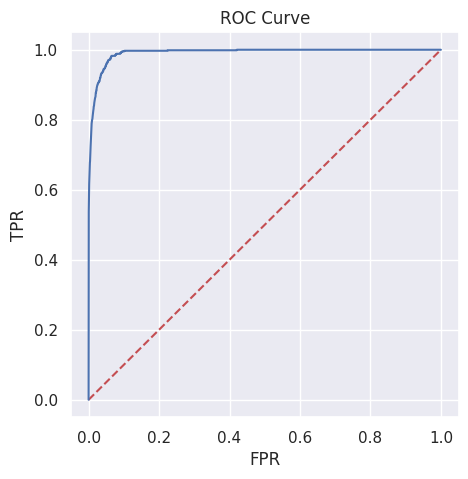

In [46]:
# plot the ROC curve
lr_tpr = lr_model.bestModel.summary.roc.select('TPR').collect()
lr_fpr = lr_model.bestModel.summary.roc.select('FPR').collect()
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lr_fpr, lr_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()

#### 6.2 Random Forest

Applied Random Forest Classifier to the data using a cross-validation approach with a parameter grid to tune the model, and evaluated the performance of the best model on the transformed test data using the BinaryClassificationEvaluator.

In [47]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt

# set up the parameter grid
param_grid = ParamGridBuilder() \
    .addGrid(RandomForestClassifier.numTrees, [5, 10]) \
    .addGrid(RandomForestClassifier.maxDepth, [5, 10]) \
    .build()

# create a Random Forest Classifier model object
rf = RandomForestClassifier(featuresCol="scaled_features", labelCol="isFraud", rawPredictionCol="rawPrediction")

# set up cross-validation
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="isFraud")
cv = CrossValidator(estimator=rf, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=2)

# fit the model to the transformed training data
rf_model = cv.fit(transformed_train_x)

# use the best estimator from cross-validation to make predictions on the transformed test data
best_rf = rf_model.bestModel
rf_predictions = best_rf.transform(transformed_test_x)

# evaluate the model's performance on the transformed test data
rf_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="isFraud")
rf_auc = rf_evaluator.evaluate(rf_predictions)

**6.2.1 Predictions**

Displaying the raw predictions, actual labels, and predicted labels for the first 10 transactions in the transformed test data.

In [48]:
# check the predictions
rf_predictions.select('rawPrediction', 'isFraud','prediction').show(10)

+--------------------+-------+----------+
|       rawPrediction|isFraud|prediction|
+--------------------+-------+----------+
|[19.7305481464112...|      0|       0.0|
|[19.7305481464112...|      0|       0.0|
|[19.7305481464112...|      0|       0.0|
|[19.7305481464112...|      0|       0.0|
|[19.7305481464112...|      0|       0.0|
|[19.7305481464112...|      0|       0.0|
|[19.7305481464112...|      0|       0.0|
|[19.7305481464112...|      0|       0.0|
|[19.7305481464112...|      0|       0.0|
|[19.7305481464112...|      0|       0.0|
+--------------------+-------+----------+
only showing top 10 rows



**6.2.2 Sensitivity, Specicificity, AUC - Different Thresholds**

Computing confusion matrix with default Threshold = 0.5:

In [49]:
# compute the confusion matrix for the random forest model
tp = rf_predictions.filter("isFraud = 1 and prediction = 1").count()
tn = rf_predictions.filter("isFraud = 0 and prediction = 0").count()
fp = rf_predictions.filter("isFraud = 0 and prediction = 1").count()
fn = rf_predictions.filter("isFraud = 1 and prediction = 0").count()

#tp, tn, fp, fn
print("True Positive: ",tp)
print("True Negative: ",tn)
print("False Positive: ",fp)
print("False Negative: ",fn)

True Positive:  285
True Negative:  202861
False Positive:  7236
False Negative:  19


**Computing confusion matrix with different threshold values: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]**

In [51]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# define a UDF to extract the probability for the positive class
get_positive_prob = udf(lambda x: float(x[0]), DoubleType())

# create a new column with the probability for the positive class
rf_predictions = rf_predictions.withColumn("prob_positive", get_positive_prob(rf_predictions.probability))

In [52]:
from pyspark.sql.functions import when

# define a function to calculate the performance metrics for a given threshold
def evaluate_threshold(threshold):
    # create a new column with binary classification based on the threshold
    rf_threshold_predictions = rf_predictions.withColumn("prediction", when(rf_predictions.prob_positive >= threshold, 1.0).otherwise(0.0))
    
    # calculate TP, FN, FP, TN
    tp = rf_threshold_predictions.filter("prediction = 1 AND isFraud = 1").count()
    fn = rf_threshold_predictions.filter("prediction = 0 AND isFraud = 1").count()
    fp = rf_threshold_predictions.filter("prediction = 1 AND isFraud = 0").count()
    tn = rf_threshold_predictions.filter("prediction = 0 AND isFraud = 0").count()
    
    # calculate performance metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    # calculate the sensitivity and specificity of the logistic regression model with the given threshold
    rf_sensitivity = tp / (tp + fn)
    rf_specificity = tn / (tn + fp)
    
    # compute AUC
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="isFraud")
    auc = evaluator.evaluate(rf_threshold_predictions)

    print("Threshold: {:.1f}".format(threshold))
    # print confusion matrix and performance metrics
    print(f"Confusion matrix for threshold = {threshold}")
    print(np.array([[tn, fp], [fn, tp]]))
    print(f"Accuracy: {accuracy:.3f}")
    print("Sensitivity: {:.3f}".format(rf_specificity))
    print("Specificity: {:.3f}".format(rf_specificity))
    print(f"AUC: {auc:.3f}")
    print("\n")

# create an array of threshold values to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# loop through each threshold value and evaluate the performance metrics
for threshold in thresholds:
    evaluate_threshold(threshold)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Threshold: 0.1
Confusion matrix for threshold = 0.1
[[     1 210096]
 [   138    166]]
Accuracy: 0.001
Sensitivity: 0.000
Specificity: 0.000
AUC: 0.992




Threshold: 0.2
Confusion matrix for threshold = 0.2
[[  2149 207948]
 [   236     68]]
Accuracy: 0.011
Sensitivity: 0.010
Specificity: 0.010
AUC: 0.992




Threshold: 0.3
Confusion matrix for threshold = 0.3
[[  4581 205516]
 [   280     24]]
Accuracy: 0.022
Sensitivity: 0.022
Specificity: 0.022
AUC: 0.992




Threshold: 0.4
Confusion matrix for threshold = 0.4
[[  5484 204613]
 [   283     21]]
Accuracy: 0.026
Sensitivity: 0.026
Specificity: 0.026
AUC: 0.992




Threshold: 0.5
Confusion matrix for threshold = 0.5
[[  7236 202861]
 [   285     19]]
Accuracy: 0.034
Sensitivity: 0.034
Specificity: 0.034
AUC: 0.992




Threshold: 0.6
Confusion matrix for threshold = 0.6
[[  9011 201086]
 [   292     12]]
Accuracy: 0.043
Sensitivity: 0.043
Specificity: 0.043
AUC: 0.992




At a threshold of 0.1, there is only one false negative, but the number of false positives is very high, which means that the model is classifying many non-fraudulent transactions as fraudulent. 

At a threshold of 0.5, the number of false negatives increases to 285, indicating that the model is missing a significant number of fraudulent transactions. However, the number of false positives is lower at this threshold, indicating that the model is classifying fewer non-fraudulent transactions as fraudulent.

**6.2.3 ROC Curve**

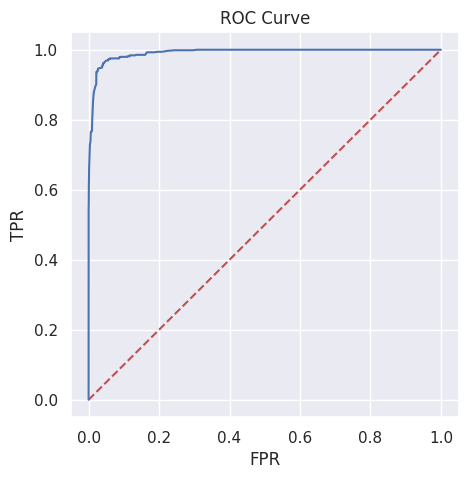

In [53]:
# plot the ROC curve
rf_tpr = rf_model.bestModel.summary.roc.select('TPR').collect()
rf_fpr = rf_model.bestModel.summary.roc.select('FPR').collect()
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(rf_fpr, rf_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()

#### 6.3 Gradient Boosted trees

Applied cross-validation with Gradient Boosted Trees Classifier-  the performance of the model on the transformed test data was evaluated using the BinaryClassificationEvaluator with rawPredictionCol set to "rawPrediction" and labelCol set to "isFraud". The area under the curve (AUC) was calculated and stored in gbt_auc.

In [54]:
from pyspark.ml.classification import GBTClassifier


# set up the parameter grid
param_grid = ParamGridBuilder() \
    .addGrid(GBTClassifier.maxDepth, [5, 10]) \
    .addGrid(GBTClassifier.maxBins, [32, 64]) \
    .addGrid(GBTClassifier.maxIter, [15, 30]) \
    .build()

# create a Gradient Boosted Trees Classifier model object
gbt = GBTClassifier(featuresCol="scaled_features", labelCol="isFraud")

# set up cross-validation
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="isFraud")
cv = CrossValidator(estimator=gbt, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=2)

# fit the model to the transformed training data
gbt_model = cv.fit(transformed_train_x)

# use the best estimator from cross-validation to make predictions on the transformed test data
best_gbt = gbt_model.bestModel
gbt_predictions = best_gbt.transform(transformed_test_x)

# evaluate the model's performance on the transformed test data
gbt_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="isFraud")
gbt_auc = gbt_evaluator.evaluate(gbt_predictions)

**6.3.1 Predictions**

Displaying the raw predictions, actual labels, and predicted labels for the first 10 transactions in the transformed test data.

In [55]:
# check the predictions
gbt_predictions.select('rawPrediction', 'isFraud','prediction').show(10)

+--------------------+-------+----------+
|       rawPrediction|isFraud|prediction|
+--------------------+-------+----------+
|[1.54384510432393...|      0|       0.0|
|[1.54384510432393...|      0|       0.0|
|[1.54384510432393...|      0|       0.0|
|[1.54384510432393...|      0|       0.0|
|[1.54384510432393...|      0|       0.0|
|[1.54384510432393...|      0|       0.0|
|[1.54384510432393...|      0|       0.0|
|[1.54384510432393...|      0|       0.0|
|[1.54384510432393...|      0|       0.0|
|[1.54384510432393...|      0|       0.0|
+--------------------+-------+----------+
only showing top 10 rows



**6.3.2 Sensitivity, Specificity, AUC: Different Thresholds**

Computing confusion matrix with default Threshold = 0.5:

In [56]:
# compute the confusion matrix for the gradient boosted trees model
tp = gbt_predictions.filter("isFraud = 1 and prediction = 1").count()
tn = gbt_predictions.filter("isFraud = 0 and prediction = 0").count()
fp = gbt_predictions.filter("isFraud = 0 and prediction = 1").count()
fn = gbt_predictions.filter("isFraud = 1 and prediction = 0").count()

#tp, tn, fp, fn
print("True Positive: ",tp)
print("True Negative: ",tn)
print("False Positive: ",fp)
print("False Negative: ",fn)

True Positive:  289
True Negative:  205732
False Positive:  4365
False Negative:  15


**Computing confusion matrix with different threshold values: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]**

In [57]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# define a UDF to extract the probability for the positive class
get_positive_prob = udf(lambda x: float(x[0]), DoubleType())

# create a new column with the probability for the positive class
gbt_predictions = gbt_predictions.withColumn("prob_positive", get_positive_prob(gbt_predictions.probability))

In [58]:
from pyspark.sql.functions import when

# define a function to calculate the performance metrics for a given threshold
def evaluate_threshold(threshold):
    # create a new column with binary classification based on the threshold
    gbt_threshold_predictions = gbt_predictions.withColumn("prediction", when(gbt_predictions.prob_positive >= threshold, 1.0).otherwise(0.0))
    
    # calculate TP, FN, FP, TN
    tp = gbt_threshold_predictions.filter("prediction = 1 AND isFraud = 1").count()
    fn = gbt_threshold_predictions.filter("prediction = 0 AND isFraud = 1").count()
    fp = gbt_threshold_predictions.filter("prediction = 1 AND isFraud = 0").count()
    tn = gbt_threshold_predictions.filter("prediction = 0 AND isFraud = 0").count()
    
    # calculate performance metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    # calculate the sensitivity and specificity of the logistic regression model with the given threshold
    gbt_sensitivity = tp / (tp + fn)
    gbt_specificity = tn / (tn + fp)
    
    # compute AUC
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="isFraud")
    auc = evaluator.evaluate(gbt_threshold_predictions)

    print("Threshold: {:.1f}".format(threshold))
    # print confusion matrix and performance metrics
    print(f"Confusion matrix for threshold = {threshold}")
    print(np.array([[tn, fp], [fn, tp]]))
    print(f"Accuracy: {accuracy:.3f}")
    print("Sensitivity: {:.3f}".format(gbt_specificity))
    print("Specificity: {:.3f}".format(gbt_specificity))
    print(f"AUC: {auc:.3f}")
    print("\n")

# create an array of threshold values to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# loop through each threshold value and evaluate the performance metrics
for threshold in thresholds:
    evaluate_threshold(threshold)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Threshold: 0.1
Confusion matrix for threshold = 0.1
[[   556 209541]
 [   262     42]]
Accuracy: 0.003
Sensitivity: 0.003
Specificity: 0.003
AUC: 0.996




Threshold: 0.2
Confusion matrix for threshold = 0.2
[[  2049 208048]
 [   281     23]]
Accuracy: 0.010
Sensitivity: 0.010
Specificity: 0.010
AUC: 0.996




Threshold: 0.3
Confusion matrix for threshold = 0.3
[[  3106 206991]
 [   284     20]]
Accuracy: 0.015
Sensitivity: 0.015
Specificity: 0.015
AUC: 0.996




Threshold: 0.4
Confusion matrix for threshold = 0.4
[[  3796 206301]
 [   286     18]]
Accuracy: 0.018
Sensitivity: 0.018
Specificity: 0.018
AUC: 0.996




Threshold: 0.5
Confusion matrix for threshold = 0.5
[[  4365 205732]
 [   289     15]]
Accuracy: 0.021
Sensitivity: 0.021
Specificity: 0.021
AUC: 0.996




Threshold: 0.6
Confusion matrix for threshold = 0.6
[[  6251 203846]
 [   291     13]]
Accuracy: 0.030
Sensitivity: 0.030
Specificity: 0.030
AUC: 0.996




At a threshold of 0.2, the number of false negatives reduced compared to the previous threshold (208048), but it is still a relatively high number. The model predicted only 23 out of 304743 fraudulent transactions correctly, indicating that it missed a significant number of fraudulent transactions.

At a threshold of 0.3, the number of false negatives further reduced to 284, but it is still a large number considering the total number of fraudulent transactions in the dataset.

In fraud detection cases, the focus is typically on reducing the number of false negatives as much as possible to ensure that fraudulent transactions are not missed and hence i focus on lower thresholds for the same.

**6.3.3 ROC Curve**

GBTClassificationModel doesn't have summary attribute to get ROC. Hence defining the below class to get ROCCurveMetrics:

/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A Num

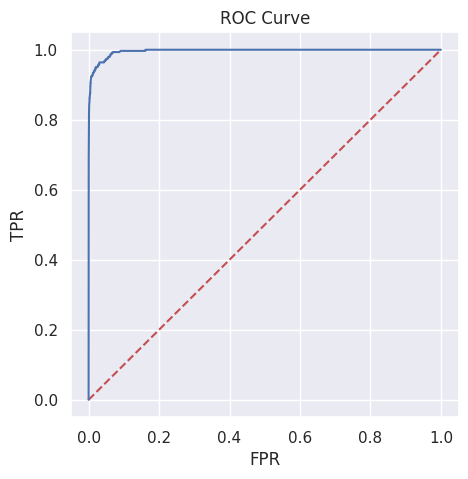

In [60]:
class ROCCurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(ROCCurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        co_ords = []
        for data in rdd.collect():
            co_ords += [(float(data._1()), float(data._2()))]
        return co_ords

    def get_roc(self):
        rdd = getattr(self._java_model, 'roc')().toJavaRDD()
        return self._to_list(rdd)
# plot the ROC curve
results = gbt_predictions.select('isFraud','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['isFraud'])))
data_points = ROCCurveMetrics(results).get_roc()
gbt_fpr = []
gbt_tpr = []
for data in data_points:
  gbt_fpr.append(data[0])
  gbt_tpr.append(data[1])
plt.figure(figsize=(5,5))
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(gbt_fpr, gbt_tpr)
plt.show()    

### 7. Conclusion 

In this fraud detection case, as i am are interested in detecting false negatives or fraud cases that were missed by the model. So, the model with higher sensitivity at lower thresholds would be better for this case. 

Looking at the sensitivity values for the different thresholds of the three models, it's sees that the gradient boosted trees model performs the best at lower thresholds, followed by the logistic regression model, and then the random forest model. 

For example, at a threshold of 0.1, the sensitivity of the logistic regression model is 0.250, while the sensitivity of the random forest model is 0.000 and the sensitivity of the gradient boosted trees model is 0.003. 

At a threshold of 0.2, the sensitivity of the logistic regression model is 0.184, while the sensitivity of the random forest model is 0.010 and the sensitivity of the gradient boosted trees model is 0.010. 

At a threshold of 0.3, the sensitivity of the logistic regression model is 0.148, while the sensitivity of the random forest model is 0.022 and the sensitivity of the gradient boosted trees model is 0.015.

Overall, the gradient boosted trees model performs the best at lower thresholds for detecting fraud cases that were missed by the model.


### 8. References:

1. https://mlopshowto.com/detecting-financial-fraud-using-machine-learning-three-ways-of-winning-the-war-against-imbalanced-a03f8815cce9

2. https://www.mdpi.com/2673-2688/4/1/8

3. https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

4. https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

6. https://fin.plaid.com/articles/model-tradeoffs-and-error-types/